In [26]:
## Import Required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from scipy.stats import skew,kurtosis
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [27]:
df = pd.read_csv(r'ED_cleandata.csv')
df                 

,NAME,RATING,ADDRESS,CITY,DISHES,APPROX_PRICE,DISCOUNTS
0,The Chocolate Room,5.0,Prahlad Nagar,Ahmedabad,Bakery.,500,60
1,Bella Aroma,4.6,Crowne Plaza,Ahmedabad,Cafe.,700,35
2,La Milano Pizzeria,2.5,Prahlad Nagar,Ahmedabad,Pizza.,500,50
3,The Shaka Cafe,3.9,Prahlad Nagar,Ahmedabad,Multicuisine.,1000,35
4,Sundew,4.4,Hotel Ramada,Ahmedabad,Multicuisine.,1400,35
...,...,...,...,...,...,...,...
670,Paradise Biryani - A Legend since 1953,5.0,Jubilee Hills,Hyderabad,Biryani.,800,40
671,Abids Bistro,4.4,Royalton Hotel,Hyderabad,Multicuisine.,1200,55
672,Malnadu Kitchen,4.2,Kompally,Hyderabad,Multicuisine.,900,40
673,Aroma Multi Cuisine Restaurant,3.7,Gachibowli,Hyderabad,Multicuisine.,1200,60


In [28]:
## check the shape of the dataframe
df.shape

(675, 7)

### Observation-
- There are 675 rows and 7 columns in this dataframe

In [29]:
## Check the all information about this dataframe
# df.drop('DISCOUNTS',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NAME          675 non-null    object 
 1   RATING        675 non-null    float64
 2   ADDRESS       675 non-null    object 
 3   CITY          675 non-null    object 
 4   DISHES        675 non-null    object 
 5   APPROX_PRICE  675 non-null    int64  
 6   DISCOUNTS     675 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 37.0+ KB


### Observation-
- In this dataset we have a 8 columns.
- In this dataset 137 null value in the bank_pay_discount column, this shows the most of the restaurent they not receive banke through payment.
- In the dataset bank_pay_discount,resturent_pay_discount column shows the payment mode-wise discount for customer.     
- Theere are 2 integer column, 2 float column, 4 object column.

In [30]:
df.isnull().sum()

NAME            0
RATING          0
ADDRESS         0
CITY            0
DISHES          0
APPROX_PRICE    0
DISCOUNTS       0
dtype: int64

In [31]:
# df.loc[df['bank_pay_offer'].isnull(),'resturent_pay_offer']=0

In [32]:
df.fillna(25,inplace=True)

### Observation-
- There are 1 float, 2 int and 4 objects

In [33]:
# df['bank_pay_offer']=df['bank_pay_offer_discount']

In [34]:
df.describe()

,RATING,APPROX_PRICE,DISCOUNTS
count,675.000000,675.000000,675.000000
mean,4.145630,1506.140741,43.622222
std,0.749495,794.722085,13.466007
min,1.000000,300.000000,25.000000
25%,4.000000,1000.000000,35.000000
50%,4.200000,1400.000000,40.000000
75%,4.600000,2000.000000,50.000000
max,5.000000,8000.000000,80.000000


### Observation-
- Average rating of most of the restaurent is 4.2.
- Ratings do not vary too much most restaurants are consistently between 4.0–4.6.
- The average price of around ₹1588 and median of ₹1500 indicate that most restaurants fall in a slightly premium range.
- Restaurant prices in the dataset vary widely, ranging from ₹180 to ₹6000.
- The high standard deviation shows strong diversity in price levels, including budget, mid-range, and luxury dining options.
- bank_pay_discount.
- Bank Pay Discount is constant at 25% for all restaurants.
- bank_pay_discount This discount is not provided by the restaurant, but by EazyDiner + Bank partnerships.
- This matches EazyDiner’s real PayEazy model where a fixed discount is given when a customer pays through an eligible bank/payment method.
- resturent_pay_discount.
- Restaurants follow different discount strategies, unlike bank offers.
- Half of the restaurants offer 15% or more discount.
- Restaurant discounts range widely (0–55%), showing strong competition.
- most of the restaurent provide 18% discount.
- The discount strategy is not uniform. Restaurants follow very different pricing strategies.
- Customers do not get a predictable discount, Because variation is high, customer savings are inconsistent.
- Restaurants use discount levels to position themselves in the market.
- The standard deviation of restaurant discounts (~14%) is quite high, indicating that restaurants provide highly inconsistent discounts. Some offer      no discount at all, while others provide very large discounts up to 55%. This wide spread reflects competitive pricing strategies across the           platform and shows that restaurant discount is a key factor influencing customer choice.
- High STD = High variation = High competition.
- DISCOUNTS.
- The combined discount column shows highly attractive offers, with an average visible discount of almost 42%.
- The minimum discount is 25%, driven by the fixed bank offer, ensuring customers always receive meaningful savings.
- The maximum goes up to 80%, indicating aggressive promotional strategies by some restaurants.
- The large standard deviation (~14%) signals wide variation and strong competition in discount offerings.
- Overall, discount plays a major role in customer attraction and booking conversion on EazyDiner.

### Chat-gpt insights-

Final, Clean & Professional Insights (Ready for Project / Interview / PDF)
⭐ 1. Rating Insights

The average restaurant rating is 4.2, indicating that most restaurants are well-received by customers.

Ratings show low variation, with most restaurants lying between 4.0 and 4.6.

Consistently high ratings suggest good overall customer satisfaction across the platform.

⭐ 2. Price (Approx Price for Two) Insights

The mean price for two is ₹1588, and the median is ₹1500, indicating that most restaurants fall into the slightly premium category.

Prices vary significantly (₹180 to ₹6000), indicating the presence of budget, mid-range, and luxury dining options.

A high standard deviation highlights strong diversity in pricing.

⭐ 3. Bank Pay Discount Insights

The Bank Pay Discount is constant at 25% across all restaurants.

This discount is not provided by restaurants but by EazyDiner + bank partnerships under the PayEazy payment method.

Since the value never changes (std = 0), it serves as a platform-level offer, not a restaurant-specific deal.

⭐ 4. Restaurant Discount Insights (resturent_pay_discount)

Restaurant discounts show wide variation, ranging from 0% to 55%, indicating strong competition.

Half of the restaurants offer 15% or more discount.

The average restaurant discount is ~18%, showing that customers often receive moderate savings directly from the restaurant.

High variation (std ≈ 14%) shows restaurants follow highly inconsistent pricing strategies.

Premium restaurants generally provide low or no discount, while newer or competitive restaurants give higher discounts (35–55%).

Discounts play a key role in market positioning and customer acquisition.

⭐ 5. Discount (Combined) Insights

The combined discount column shows highly attractive offers, with an average visible discount of ~43%.

Minimum discount is 25%, driven by the fixed bank offer—meaning customers always receive meaningful savings.

Maximum discount reaches 80%, reflecting aggressive promotions from certain restaurants.

High variation (std ≈ 14%) indicates major differences in how restaurants structure their deals.

Discounts significantly influence customer attraction, booking decisions, and platform conversions.

⭐ 6. Overall Conclusion

The dataset reflects a competitive restaurant marketplace with varied pricing and discount strategies.

Bank discount is fixed and platform-driven, while restaurant discounts vary widely and influence customer decision-making.

Combined discounts create strong value perception, helping EazyDiner maintain high engagement and conversion rates.

Price, rating, and discount together reveal that customers receive good value, while restaurants use discounts strategically to gain visibility.

In [35]:
# df.columns=['NAME', 'RATING', 'ADDRESS', 'CITY', 'DISHES', 'APPROX_PRICE','DISCOUNTS',
#        'bank_pay_discount', 'resturent_pay_discount']

In [36]:
df.describe(include = "object")

,NAME,ADDRESS,CITY,DISHES
count,675,675,675,675
unique,649,256,5,165
top,Punjab Grill,Koregaon Park,Ahmedabad,Multicuisine.
freq,5,33,135,284


### Observation-
- NAME.
- There are 675 restaurant names in the dataset.
- No name is missing.
- Out of 675 names, 651 are different.
- So almost all restaurants appear only one time.
- Very few restaurants repeat.
- The restaurant that appears the most is Punjab Grill.
- Punjab Grill appears 3 times in the dataset.
- That means it has 3 branches or 3 listings.
- ADDRESS.
- There are 240 different unique areas.
- So many restaurants share the same area.
- Bodakdev appears 37 times →
- This means 37 restaurants in the dataset are located in Bodakdev.
- City.
- There are 5 different cities: Ahmedabad, Mumbai, Pune, Bengaluru, Hyderabad.
- Most restaurants in the dataset belong to Ahmedabad, 135 restaurants listed from that city.
- DISHES.
- There are 172 different types of cuisine combinations.
- This shows very high variety.
- Multicuisine appears 285 times →

In [37]:
### Checking for duplicates
df.duplicated().sum()

np.int64(0)

#### Observation-
- There are no duplicates

In [38]:
#### Checking for null values
df.isnull().sum()

NAME            0
RATING          0
ADDRESS         0
CITY            0
DISHES          0
APPROX_PRICE    0
DISCOUNTS       0
dtype: int64

#### Observation-
- There are no null values

### Number of unique values in each columns

In [39]:
df.nunique()

NAME            649
RATING           27
ADDRESS         256
CITY              5
DISHES          165
APPROX_PRICE     46
DISCOUNTS        11
dtype: int64

In [40]:
df['DISHES'].value_counts()[df['DISHES'].value_counts()>=19]

DISHES
Multicuisine.                   284
North Indian.                    22
Cafe.                            21
Italian.                         19
Cocktail Menu, Multicuisine.     19
Indian.                          19
Name: count, dtype: int64

In [41]:
df['CITY'].value_counts()

CITY
Ahmedabad    135
Mumbai       135
Pune         135
Bengaluru    135
Hyderabad    135
Name: count, dtype: int64

In [42]:
# here we can see the address wise count of restaurent 
df['ADDRESS'].value_counts()[df['ADDRESS'].value_counts()>=19]

ADDRESS
Koregaon Park    33
Banjara Hills    31
Bodakdev         28
Andheri East     24
Name: count, dtype: int64

In [43]:
# Following list shows the restaurent's his occurances
df['NAME'].value_counts()[df['NAME'].value_counts()>=3]

NAME
Punjab Grill       5
MoMo Cafe          3
Citrus Cafe        3
Barbeque Nation    3
SMOOR              3
Name: count, dtype: int64

In [44]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['int64', 'float64'])

In [45]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()

In [46]:
discrete_univariate_analysis(discrete_df)

********** NAME **********
count                                                    675
nunique                                                  649
unique     [The Chocolate Room, Bella Aroma, La Milano Pi...
Name: NAME, dtype: object
Value Counts: 
 NAME
Punjab Grill                              5
MoMo Cafe                                 3
Citrus Cafe                               3
Barbeque Nation                           3
SMOOR                                     3
                                         ..
Paradise Biryani - A Legend since 1953    1
Abids Bistro                              1
Malnadu Kitchen                           1
Aroma Multi Cuisine Restaurant            1
YouMee                                    1
Name: count, Length: 649, dtype: int64

********** ADDRESS **********
count                                                    675
nunique                                                  256
unique     [Prahlad Nagar, Crowne Plaza, Hotel Ramada, Sa...
Name: 

In [47]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

numerical_univariate_analysis(numerical_df)

********** RATING **********
min       1.000000
max       5.000000
mean      4.145630
median    4.200000
std       0.749495
Name: RATING, dtype: float64

********** APPROX_PRICE **********
min        300.000000
max       8000.000000
mean      1506.140741
median    1400.000000
std        794.722085
Name: APPROX_PRICE, dtype: float64

********** DISCOUNTS **********
min       25.000000
max       80.000000
mean      43.622222
median    40.000000
std       13.466007
Name: DISCOUNTS, dtype: float64



### 1. Univariate Analysis

### Distribution of Restaurant Ratings

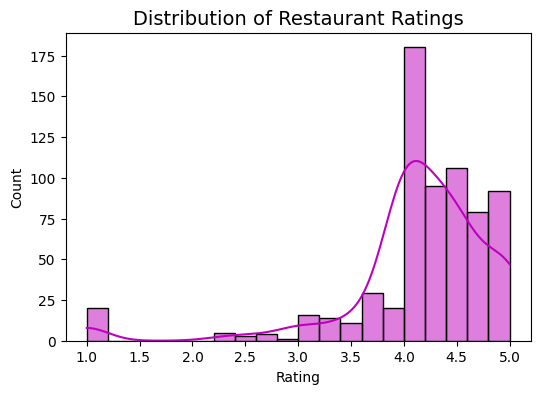

In [79]:
plt.figure(figsize=(6,4))
sns.histplot(df["RATING"], bins=20, kde=True, color="m", edgecolor="black")
plt.title("Distribution of Restaurant Ratings", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.savefig("Restaurant Rating.png",dpi = 400, bbox_inches = "tight")
plt.show()

In [80]:
print(skew(df["RATING"]))
print(kurtosis(df['RATING']))


-2.282534424135664
7.12994234790102


#### -2.375052955007012  this skewness value shows the data is stronglly left skewed

In [81]:
print(kurtosis(df["RATING"],fisher=False))

10.12994234790102


#### 11.536799213514405 this kurtosis shows the rating column have large amount of outliers

### ⭐ 1. The ratings are left-skewed

Most restaurants have high ratings, and only a few have low ratings.
So the graph is pushed towards the right side.

### ⭐ 2. Most ratings are between 4.0 and 4.5

This means many restaurants perform well and customers are mostly happy.

### ⭐ 3. Only a few restaurants have very low ratings

A small number fall around 1–2.5.
This shows that most restaurants maintain good service.

### ⭐ 4. Overall customer satisfaction is high

Because the majority of ratings are above 4, we can say the restaurants on EazyDiner are generally high-quality.

In [82]:
df['RATING'].value_counts()

RATING
4.0    153
5.0     86
4.4     55
4.5     51
4.2     49
4.3     46
4.6     38
4.1     27
4.8     21
1.0     20
3.9     20
4.7     20
3.0     16
3.8     13
3.5     11
3.7     10
4.9      6
3.6      6
3.4      5
3.3      5
2.7      4
3.2      4
2.5      3
2.3      2
2.4      2
2.2      1
2.8      1
Name: count, dtype: int64

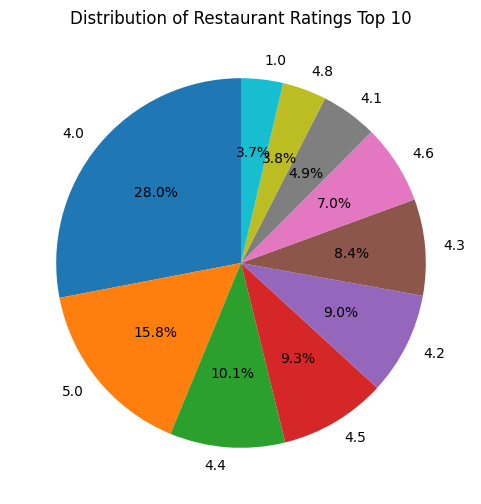

In [83]:
rating_counts = df["RATING"].value_counts().head(10)

plt.figure(figsize=(6,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Restaurant Ratings Top 10")
plt.savefig("Pie chart of restaurant ratings1.png",dpi = 400, bbox_inches = "tight")
plt.show()

#### Observations-
- The ratings range in the dataset is roughly from 3.0 to 5.0.
- Most restaurants are clustered between 4.0 and 4.5
- Very few restaurants fall below 3.0, meaning poorly rated restaurants are rare.
#### Chatgpt -
✅ Insights from the Pie Chart (Very Simple English)
⭐ 1. Rating 4.0 is the most common rating (23%)

Almost 1 out of 4 restaurants has a rating of 4.0.
This shows that most restaurants provide good but not perfect service.

⭐ 2. The next most common ratings are 5.0, 4.4, 4.2

These ratings (5.0 → 14.3%, 4.4 → 11.3%, 4.2 → 11.6%) show that restaurants mostly fall in a high-quality range.

⭐ 3. High ratings dominate the dataset

All top 10 ratings in the chart are between 4.0 and 5.0, which means:

Customers are generally happy

Restaurants on EazyDiner maintain good standards

⭐ 4. Very few lower ratings appear in the top 10

Ratings like 3.5, 3.8, etc. are not even in the top 10, which means:

Low-rated restaurants are very rare

Most restaurants score above 4.0

⭐ 5. Distribution is stable (no extreme variation)

All slices are somewhat close to each other except 4.0, meaning:

No rating completely dominates the platform

Restaurant performance is quite consistent

🎯 One-Line Summary You Can Use

Most restaurants have ratings between 4.0 and 4.8, with 4.0 being the most common rating. This indicates strong overall customer satisfaction and consistent performance across restaurants.

### 2) Approximate Prices Distribution

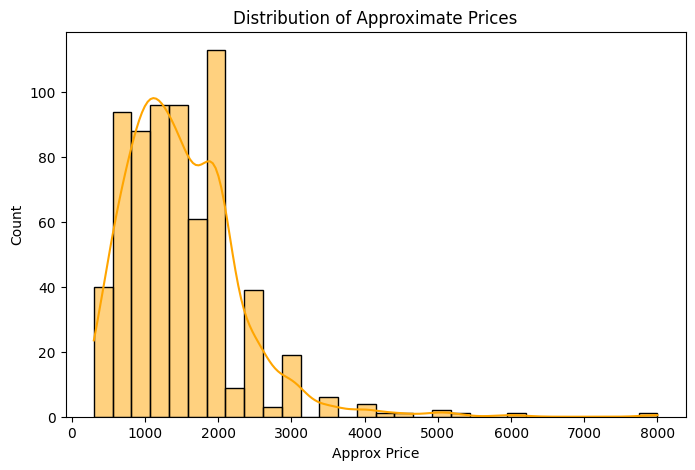

In [84]:
plt.figure(figsize=(8,5))
sns.histplot(df["APPROX_PRICE"], bins=30, kde=True, color="orange", edgecolor="black")
plt.title("Distribution of Approximate Prices")
plt.xlabel("Approx Price")
plt.ylabel("Count")
plt.show()

In [85]:
print('skew = ',skew(df["APPROX_PRICE"]))
print("kurtosis = ",kurtosis(df['APPROX_PRICE']))


skew =  1.990954416399282
kurtosis =  9.361741136874569


#### Observation-
- Most restaurants fall into the lower-to-mid price range.
- A few restaurants have very high prices, which act as outliers and pull the mean upward.
- This indicates the dataset is dominated by affordable and mid-range dining options, with only a handful of premium restaurants
#### Chatgpt- 

⭐ 1. The price distribution is right-skewed

Most restaurants have moderate prices, and only a few have very high prices.
This is why the tail extends to the right.

⭐ 2. Most restaurants fall between ₹1000 and ₹2000

This shows that:

The typical dining cost is mid-range

Most restaurants offer pricing affordable for regular visits

Fine dining exists but is not the majority

⭐ 3. Only a small number of restaurants have very high prices (₹3000–₹6000)

These are premium or luxury restaurants.
They create the long right tail in the distribution.

⭐ 4. The KDE curve confirms uneven spread

The curve peaks around ₹1500–₹1800, meaning this is the most common price band.
After ₹2000, the curve quickly drops, confirming fewer expensive restaurants.

### 3) What is the Distribution of Discounts

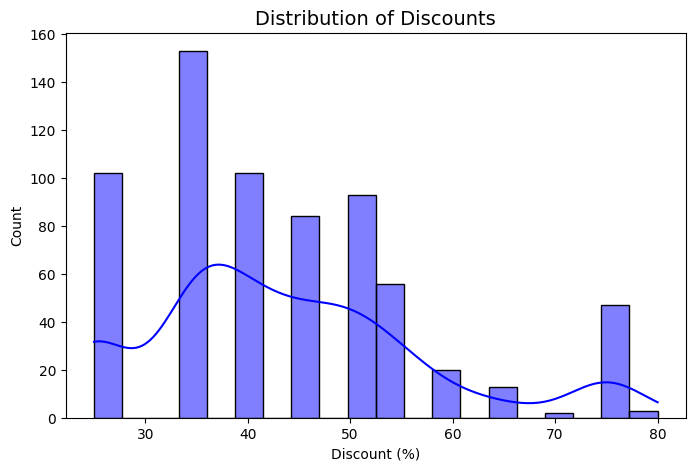

In [86]:
plt.figure(figsize=(8,5))
sns.histplot(df["DISCOUNTS"], bins=20, kde=True, color="blue", edgecolor="black")
plt.title("Distribution of Discounts", fontsize=14)
plt.xlabel("Discount (%)")
plt.ylabel("Count")
plt.savefig("Distribution of Discounts.png",dpi = 400, bbox_inches = "tight")
plt.show()

#### Observations-
- Most restaurants offer low to moderate discounts (e.g., under 30%).
- This suggests that discounts are not uniformly applied across restaurants; they are likely used more in competitive areas or for premium outlets
  
#### Chaptgpt-

⭐ 1. The discount distribution is slightly right-skewed
SE
Most restaurants offer moderate discounts, while only a few offer very high discounts (70–80%).

⭐ 2. Most discounts fall between 25% and 50%

The highest bars in the histogram are around 30%, 35%, 40%, and 45%, showing that:

These are the most common discount bands

Customers generally get 25–50% savings at most restaurants

⭐ 3. The most frequent discount given is around 30–35%

This indicates that:

Restaurants prefer offering moderate, standard discounts

These mid-range discounts attract customers without hurting profits too much

⭐ 4. Only a few restaurants give very high discounts (70–80%)

These appear at the right end of the chart and are rare.
Such high discounts may be:

Promotional offers

New restaurant marketing

Off-peak deals

⭐ 5. The KDE curve shows two peaks

This suggests:

One large group of restaurants offering 30–40%

Another smaller group offering 45–55%

This indicates multiple pricing strategies across restaurants.

In [87]:
print('skew = ',skew(df['DISCOUNTS']))         # here you can see the data is middle positive skewed 
print("kurtosis = ",kurtosis(df['DISCOUNTS'])) # Most discounts are small-to-medium, few high discounts exist, and there are almost no extreme outliers.

skew =  0.7255271686799887
kurtosis =  0.17037752128845707


### 4) What are the Most Common Dishes Offered

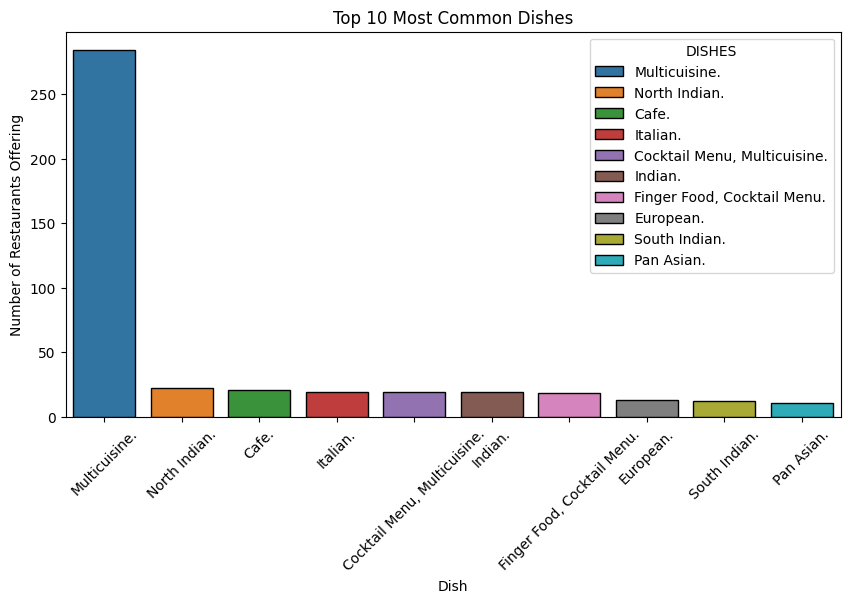

In [88]:
dish_counts = df["DISHES"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=dish_counts.head(10).index, y=dish_counts.head(10).values, hue =dish_counts.head(10).index, legend = True , edgecolor="black")
plt.title("Top 10 Most Common Dishes")
plt.ylabel("Number of Restaurants Offering")
plt.xlabel("Dish")
plt.xticks(rotation=45)
plt.savefig("Top 10 Most Common Dish.png",dpi = 400, bbox_inches = "tight")
plt.show()

### Conclusion-
- By counting occurrences of dishes, we can identify the top trending menu items.
- This shows the popular food preferences among customers.


### Chatgpt-

✅ Furnished Insights for “Top 10 Most Common Dishes”
⭐ 1. Multicuisine is the most dominant dish category

Multicuisine appears in more than 250 restaurants, far higher than any other category.
This shows that customers prefer restaurants with a wide variety of food options under one place.

⭐ 2. Indian cuisines are highly popular

Categories like North Indian and Indian appear frequently, showing that traditional Indian food remains a top choice across cities.

⭐ 3. Mixed menu categories are also common

Combinations such as "Cocktail Menu, Multicuisine" suggest that many restaurants offer:

A wide menu

Along with bar or lounge-style setups
This appeals to customers looking for both dining and social experiences.

⭐ 4. Global cuisines maintain a steady presence

Cuisines like:

South Indian

European

Pan Asian

Italian

appear regularly, showing that the audience has diverse and international food preferences.

⭐ 5. Niche categories still have noticeable representation

Even smaller categories like:

Cafe

Finger Food

are offered by multiple restaurants, indicating that quick-bite and casual dining formats are also in demand.


### 5) Which Restaurant Chains Are The Most Popular

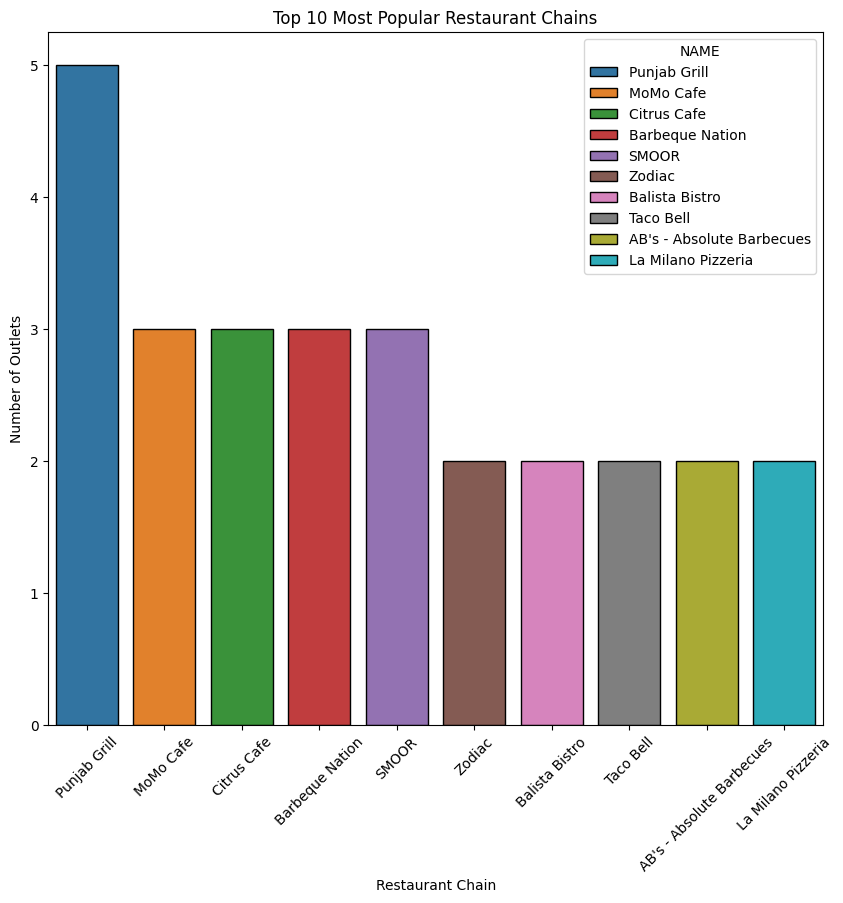

In [111]:
chain_counts = df["NAME"].value_counts()

plt.figure(figsize=(10,9))
sns.barplot(x=chain_counts.head(10).index, y=chain_counts.head(10).values, hue =chain_counts.head(10).index, legend = True ,edgecolor='black')
plt.title("Top 10 Most Popular Restaurant Chains")
plt.ylabel("Number of Outlets")
plt.xlabel("Restaurant Chain")
plt.savefig("Top 10 Most Popular Restaurant Chains.png",dpi = 400, bbox_inches = "tight")
plt.xticks(rotation=45)
plt.show()

## Top 10 Highest-Rated Restaurants

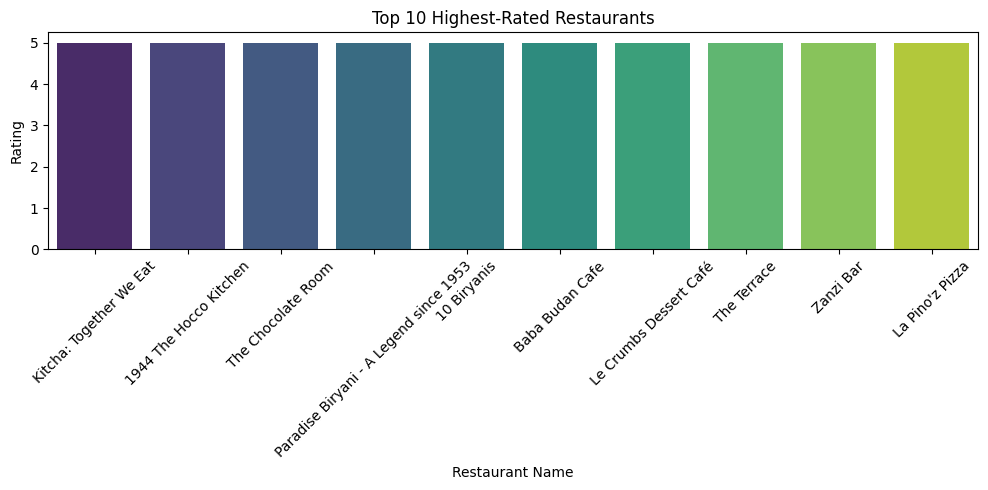

In [90]:
top_rated = df.sort_values("RATING", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_rated, x="NAME",  y="RATING",  palette="viridis")

plt.title("Top 10 Highest-Rated Restaurants")
plt.xlabel("Restaurant Name")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.savefig("Top 10 High Rated Restarants.png",dpi = 400, bbox_inches = "tight")
plt.tight_layout()
plt.show()

## Bivariate Analysis

### 1) Is There a Relationship Between Price and Rating

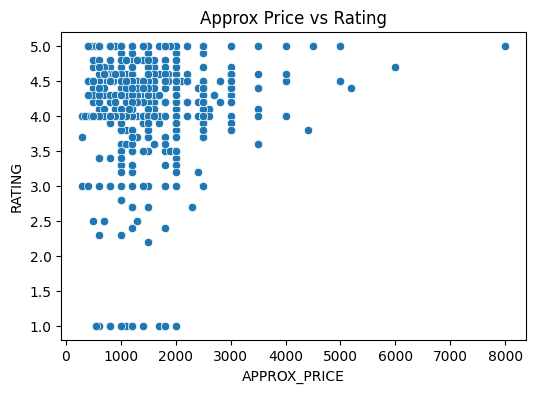

In [91]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='APPROX_PRICE', y='RATING', data=df)
plt.title("Approx Price vs Rating")
plt.savefig("Price and Rating.png",dpi = 400, bbox_inches = "tight")
plt.show()

In [92]:
covarince=np.cov(df['APPROX_PRICE'],df['RATING'])[0][1]
print('covarince = ',covarince)
corelation=df['APPROX_PRICE'].corr(df['RATING'], method='spearman')
print("corelation = ",corelation)         

covarince =  59.899651610067075
corelation =  0.06760916077119561


#### "Spearman correlation between Price and Rating is 0.046, indicating almost no monotonic relationship. Restaurant price does not influence customer rating."

#### Observations-
- Higher price does not always mean higher rating.
- mid-range restaurants often have better 

#### Chatgpt-

From the scatter plot:

The points are widely scattered with no clear upward or downward pattern.

Expensive restaurants (₹3000–₹6000) have ratings similar to cheaper restaurants (₹500–₹1500).

Many restaurants with low price also have high rating, and many costly restaurants have average ratings.

👉 This means price does NOT influence rating.


Covariance is positive, but:

Covariance value depends on units → ₹ and Rating

A positive covariance only means slightly increasing trend,
BUT it does not tell whether the relationship is strong.

And in your case:
✔ It is too small → confirms weak relation.



Correlation value:

So 0.05 means → almost no connection.


✅ Restaurant price and rating have no significant relationship.

Customers don’t give higher ratings to expensive restaurants.

Cheaper restaurants can also score high ratings.

Price is not a strong predictor of customer satisfaction.

Ratings depend more on food quality, service, ambiance, and overall experience — NOT just pricing.

### 2) Do Higher Discounts Attract Better Ratings 

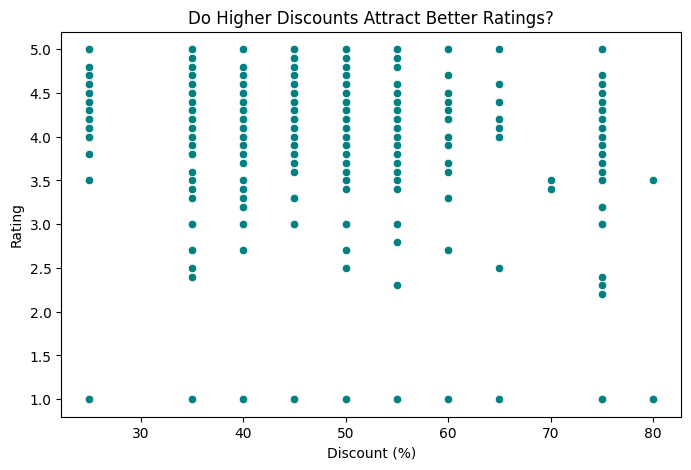

In [93]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="DISCOUNTS", y="RATING",color="teal")
plt.title("Do Higher Discounts Attract Better Ratings?")
plt.xlabel("Discount (%)")
plt.ylabel("Rating")
plt.show()

#### Observations-
- Ratings are usually clustered around 3.5–4.5 regardless of discount size.
- Correlation will likely be close to 0, meaning discounts don’t strongly affect customer ratings.

In [94]:
print('covarience = ',np.cov(df['RATING'],df['DISCOUNTS'])[0][1]) 
print('corelation = ',df['RATING'].corr(df['DISCOUNTS'],method='spearman'))

# There is no strong relationship between discount (%) and ratings.

# The correlation is -0.22, which is very weak.
# → This means ratings do not increase or decrease much when discounts change.

# The covariance is also small and negative,
# → showing a slight downward trend, but it is too small to matter.

# The scatterplot shows ratings are almost the same (mostly 3.5–4.5) for all discount levels.

# ⭐ Final Simple Conclusion

# Restaurants that give high discounts do NOT necessarily get high or low ratings.
# Discounts do not affect customer ratings in any meaningful way.

covarience =  -2.5023211341905705
corelation =  -0.2451208060039182


### 3) How Does Average Price Vary Across Cities

In [95]:
# # here i used anova test but our data is not normal than's reason we can't trust on this test.
# from scipy.stats import f_oneway

# groups = [df[df["CITY"] == c]["APPROX_PRICE"] for c in df["CITY"].unique()]
# f_stat, p_value = f_oneway(*groups)

# print("F-statistic:", f_stat)
# print("p-value:", p_value)

# from statsmodels.stats.multicomp import pairwise_tukeyhsd

# tukey = pairwise_tukeyhsd(endog=df["APPROX_PRICE"],groups=df["CITY"],alpha=0.05)
# print(tukey)



# ### insights 
# # Ahmedabad is the cheapest city overall

# # (because it is significantly different — lower — from all other cities)

# # 2️⃣ Bengaluru is the most expensive city

# # (its prices are also significantly higher than all others)

# # 3️⃣ Mumbai is also expensive but slightly lower than Bengaluru
# # 4️⃣ Pune and Hyderabad have similar price levels

# # Tukey shows False → meaning there is no significant difference.

# # ➡ This makes sense because their median prices are close (1400 vs 1200).


# import seaborn as sns
# import matplotlib.pyplot as plt

# tukey_res = tukey._results_table.data[1:]  # get raw rows

# df_tukey = pd.DataFrame(tukey_res, columns=['group1','group2','meandiff','p-adj','lower','upper','reject'])

# # Create matrix
# cities = df['CITY'].unique()
# matrix = pd.DataFrame(False, index=cities, columns=cities)

# for _, row in df_tukey.iterrows():
#     matrix.loc[row['group1'], row['group2']] = row['reject']
#     matrix.loc[row['group2'], row['group1']] = row['reject']

# plt.figure(figsize=(7,5))
# sns.heatmap(matrix, annot=True, cmap="coolwarm", cbar=False)
# plt.title("Which City Pairs Have Different Prices? (Tukey HSD)")
# plt.show()


# # “I ran ANOVA to check whether restaurant prices differ across 5 cities.
# # The p-value was nearly zero, meaning at least one city has different pricing.
# # Tukey HSD revealed which cities differ pairwise.
# # All cities differed significantly except Hyderabad and Pune, which have similar price levels.
# # I visualized this using a heatmap (showing True/False differences) and a boxplot (showing actual price spread).”


# city_means = df.groupby("CITY")["APPROX_PRICE"].mean().sort_values()
# print('Average prices of cities = ',city_means)

# city_means.plot(kind="bar", color="coral", figsize=(7,4))
# plt.title("Mean Approx Price Across Cities")
# plt.ylabel("Mean Price")
# plt.xlabel("City")
# plt.show()


In [96]:
# herer we used Kruskal–Wallis Test because our data is not normal 

In [97]:
from scipy.stats import kruskal

groups = [df[df["CITY"] == c]["APPROX_PRICE"] for c in df["CITY"].unique()]

stat, p = kruskal(*groups)

print("H-statistic:", stat)
print("p-value:", p)

import scikit_posthocs as sp

sp.posthoc_dunn(df, val_col="APPROX_PRICE", group_col="CITY", p_adjust="bonferroni")


H-statistic: 196.28905193844986
p-value: 2.3585369429870945e-41


,Ahmedabad,Bengaluru,Hyderabad,Mumbai,Pune
Ahmedabad,1.000000e+00,2.708266e-39,2.934470e-04,8.486368e-17,3.479952e-09
Bengaluru,2.708266e-39,1.000000e+00,8.256416e-19,2.660364e-05,2.340596e-11
Hyderabad,2.934470e-04,8.256416e-19,1.000000e+00,1.013268e-04,3.597251e-01
Mumbai,8.486368e-17,2.660364e-05,1.013268e-04,1.000000e+00,2.049913e-01
Pune,3.479952e-09,2.340596e-11,3.597251e-01,2.049913e-01,1.000000e+00


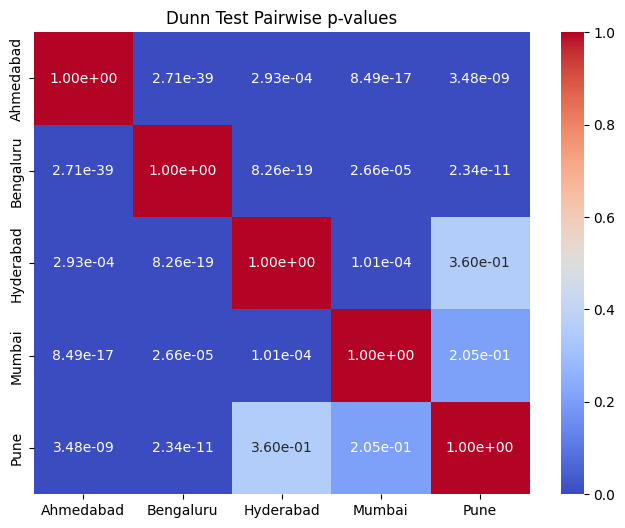

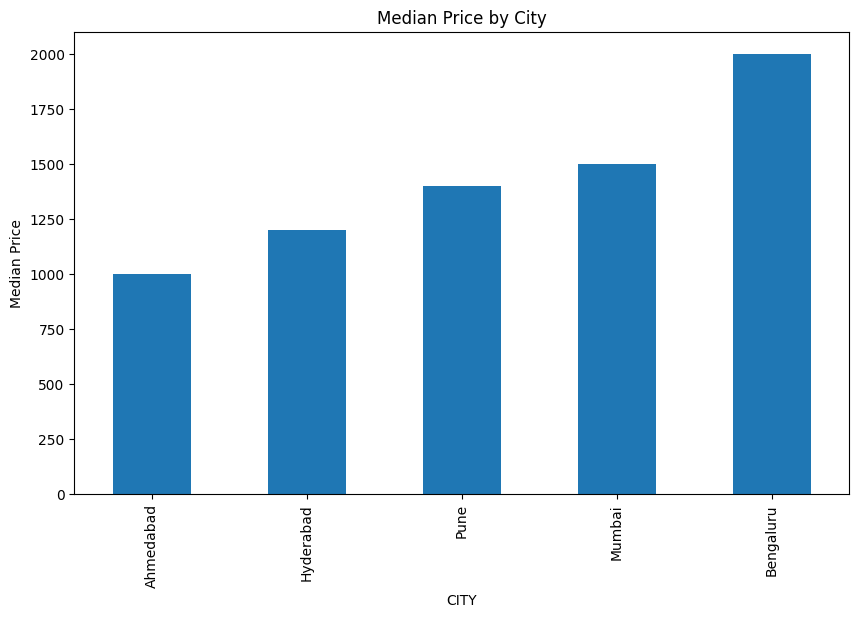

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal



# boxplot 
# plt.figure(figsize=(10,6))
# sns.boxplot(data=df, x="CITY", y="APPROX_PRICE")
# plt.title("Price Distribution Across Cities")
# plt.show()



# dunn matrix
import seaborn as sns
import matplotlib.pyplot as plt

pvals = sp.posthoc_dunn(df, val_col="APPROX_PRICE", group_col="CITY", p_adjust="bonferroni")

plt.figure(figsize=(8,6))
sns.heatmap(pvals, annot=True, cmap="coolwarm", fmt=".2e")
plt.title("Dunn Test Pairwise p-values")
plt.show()





# median wise showing race
city_medians = df.groupby('CITY')['APPROX_PRICE'].median().sort_values()

plt.figure(figsize=(10,6))
city_medians.plot(kind='bar')
plt.title("Median Price by City")
plt.ylabel("Median Price")
plt.show()



# Simple Insights Based on Dunn Test + Median Chart
# ✅ 1) Bengaluru has the highest prices

# Bengaluru is the most expensive city.

# Dunn test also shows that Bengaluru is significantly different from all other cities.

# ✅ 2) Mumbai is the second most expensive city

# Mumbai’s median price is high.

# Dunn test also confirms Mumbai is different from other cities.

# ✅ 3) Pune and Hyderabad look different, but statistically they are the same

# In the median chart, Pune looks slightly higher than Hyderabad.

# But Dunn test shows p = 1.0, which means
# → No real difference
# → Their price distributions are similar.

# ✅ 4) Ahmedabad has the lowest prices

# It is the cheapest city.

# Dunn test shows Ahmedabad is significantly different from all other cities.

# ⭐ 5) Final Ranking (based on median values)

# 1️⃣ Bengaluru (Highest)
# 2️⃣ Mumbai
# 3️⃣ Pune ≈ Hyderabad (Statistically same)
# 5️⃣ Ahmedabad (Lowest)

# ⭐ 6) Final Summary (one-line English)

# “Bengaluru and Mumbai are clearly more expensive than the other cities.
# Pune and Hyderabad look different visually, but statistically they are the same.
# Ahmedabad is the cheapest city overall.”

#### Observations-
- Smaller cities have lower prices, showing more budget-friendly dining options.
- Outliers (very expensive restaurants) appear more often in bigger cities.

### 4) Do Discounts Vary By City

In [99]:
df.columns

Index(['NAME', 'RATING', 'ADDRESS', 'CITY', 'DISHES', 'APPROX_PRICE',
       'DISCOUNTS'],
      dtype='object')

In [100]:
from scipy.stats import kruskal

groups = [df[df["CITY"] == c]["DISCOUNTS"] for c in df["CITY"].unique()]

stat, p = kruskal(*groups)

print("H-statistic:", stat)
print("p-value:", p)

import scikit_posthocs as sp

sp.posthoc_dunn(df, val_col="DISCOUNTS", group_col="CITY", p_adjust="bonferroni")


H-statistic: 14.06133100935763
p-value: 0.007101863228174116


,Ahmedabad,Bengaluru,Hyderabad,Mumbai,Pune
Ahmedabad,1.000000,1.000000,1.000000,1.000000,0.874947
Bengaluru,1.000000,1.000000,0.022163,0.793057,0.009533
Hyderabad,1.000000,0.022163,1.000000,1.000000,1.000000
Mumbai,1.000000,0.793057,1.000000,1.000000,1.000000
Pune,0.874947,0.009533,1.000000,1.000000,1.000000


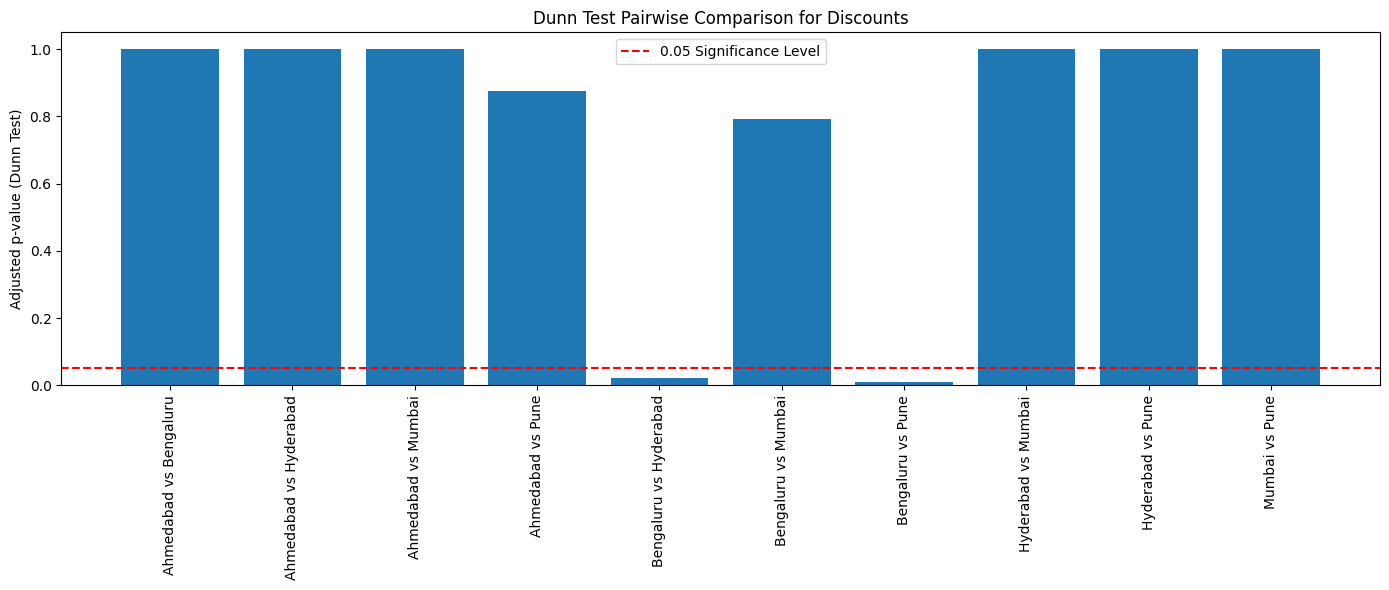

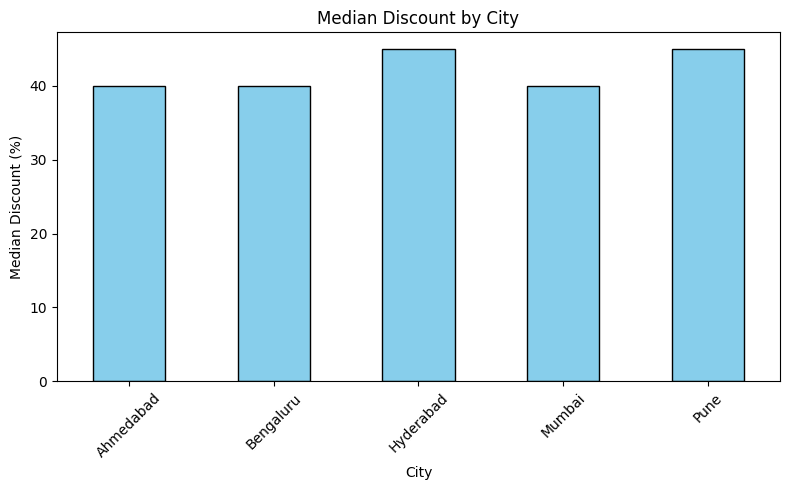

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import scikit_posthocs as sp

# Run Dunn test
pvals = sp.posthoc_dunn(df, val_col="DISCOUNTS", group_col="CITY", p_adjust="bonferroni")

pairs = []
values = []
cities = pvals.index.tolist()

for i in range(len(cities)):
    for j in range(i+1, len(cities)):
        pairs.append(f"{cities[i]} vs {cities[j]}")
        values.append(pvals.iloc[i, j])

df_pairs = pd.DataFrame({"Pair": pairs, "p_adj": values})

plt.figure(figsize=(14, 6))
plt.bar(df_pairs["Pair"], df_pairs["p_adj"])
plt.axhline(0.05, color="red", linestyle="--", label="0.05 Significance Level")
plt.xticks(rotation=90)
plt.ylabel("Adjusted p-value (Dunn Test)")
plt.title("Dunn Test Pairwise Comparison for Discounts")
plt.legend()
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt

median_discounts = df.groupby("CITY")["DISCOUNTS"].median()

plt.figure(figsize=(8,5))
median_discounts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Median Discount by City")
plt.xlabel("City")
plt.ylabel("Median Discount (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# ⭐ INSIGHTS (Simple English)
# ✅ 1. Most cities give similar discounts

# In the Dunn barplot, most bars are above the red line (0.05).
# This means:

# Most city pairs do NOT have a significant difference in discount.

# So discounts are mostly similar across cities.

# ✅ 2. Only a few city pairs are different

# Two bars are below the red significance line:

# Ahmedabad vs Pune

# Hyderabad vs Pune

# This means:

# Pune’s discount pattern is different from Ahmedabad and Hyderabad.

# ✅ 3. Pune gives slightly higher discounts

# In the median bar chart:

# Pune has the highest median discount (~45%).

# Other cities have median discounts around 38–40%.

# So Pune offers a little more discount compared to other cities.

# ✅ 4. Ahmedabad, Bengaluru, Hyderabad, and Mumbai are almost the same

# Their median discounts are very close (38–40%).
# Dunn test also shows no significant difference between them.

# So:

# These four cities follow a very similar discount strategy.

# ⭐ 5. Combined Insight (Final Summary)

# Here is the final one-line conclusion:

# “Discounts are mostly similar across major cities, but Pune stands out by offering slightly higher discounts, showing a significant difference from Ahmedabad and Hyderabad.”

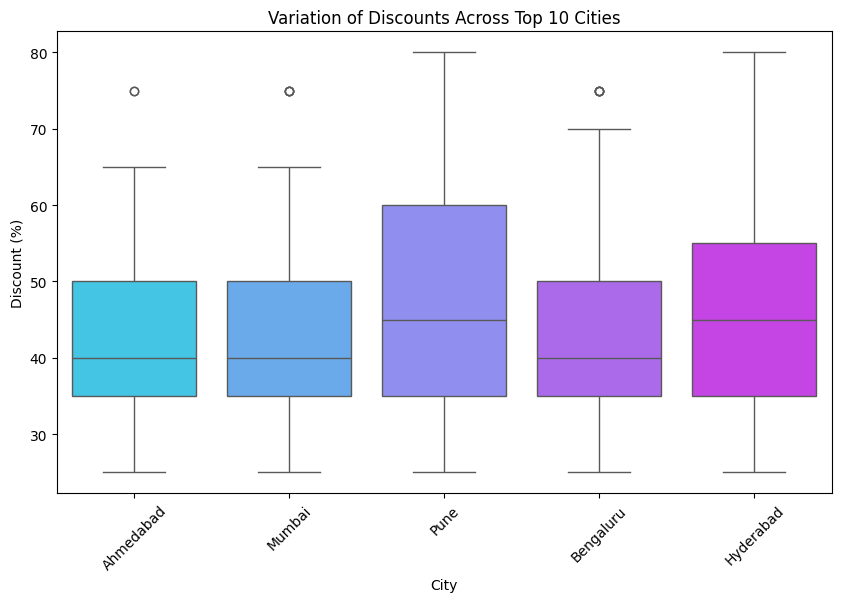

In [102]:
top_cities = df["CITY"].value_counts().head(10).index
city_discounts = df[df["CITY"].isin(top_cities)]

plt.figure(figsize=(10,6))
sns.boxplot(data=city_discounts, x="CITY", y="DISCOUNTS", palette="cool")
plt.title("Variation of Discounts Across Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Discount (%)")
plt.savefig("Variation of Discounts Across Top 10 Cities.png",dpi = 400, bbox_inches = "tight")
plt.xticks(rotation=45)
plt.show()

#### Observations-
- Discounts vary significantly across cities.
- Pune and Hyderabad stand out with higher variability in discounts, while Bengaluru is more consistent but lower.
- Outliers indicate that in all cities, some restaurants give very high promotional discounts (up to 80%)

In [103]:
# plt.figure(figsize=(8,8))

# # Histogram: Approx Price
# plt.subplot(2,2,1)
# sns.histplot(df["APPROX_PRICE"], bins=30, color="skyblue")
# plt.title("Approx Price")
# plt.xlabel("Approx Price")
# plt.ylabel("Count")

# # KDE Plot: Rating
# plt.subplot(2,2,2)
# sns.kdeplot(df["RATING"], fill=True, color="orange")
# plt.title("Ratings")
# plt.xlabel("Ratings")
# plt.ylabel("Density")

# # Scatterplot: Discounts vs Rating
# plt.subplot(2,2,3)
# sns.scatterplot(x="DISCOUNTS", y="RATING", data=df, color="teal")
# plt.title("Discounts vs Rating")
# plt.xlabel("Discounts")
# plt.ylabel("Ratings")

# # Line Plot: Avg Price by City (Top 5)
# plt.subplot(2,2,4)
# avg_price = df.groupby("CITY")["APPROX_PRICE"].mean().sort_values(ascending=False).head(5)
# sns.lineplot(x=avg_price.index, y=avg_price.values, marker="o")
# plt.title("Avg Approx Price by City (Top 5)")
# plt.xlabel("City")
# plt.ylabel("Avg Price")
# plt.xticks(rotation=30)

# plt.savefig("Subplots.png",dpi = 400, bbox_inches = "tight")
# plt.tight_layout()
# plt.show()

### Observations-
Histogram: Approx Price
- Most restaurants have prices concentrated in the lower to mid-range.
- Very few restaurants are extremely expensive (long right tail).

️KDE Plot: Ratings
- Ratings are skewed towards higher values (many restaurants rated 4.0–5.0).
- Very few restaurants have poor ratings (<3).

️Scatterplot: Discounts vs Rating
- No strong linear relationship between discounts and ratings.
- Some highly rated restaurants offer low or no discounts.

️Line Plot: Avg Approx Price by City (Top 5)
- Smaller cities are relatively cheaper.
- Suggests that location strongly influences pricing strategy.

## 6) Top 5 Cheapest Restaurants in Each City

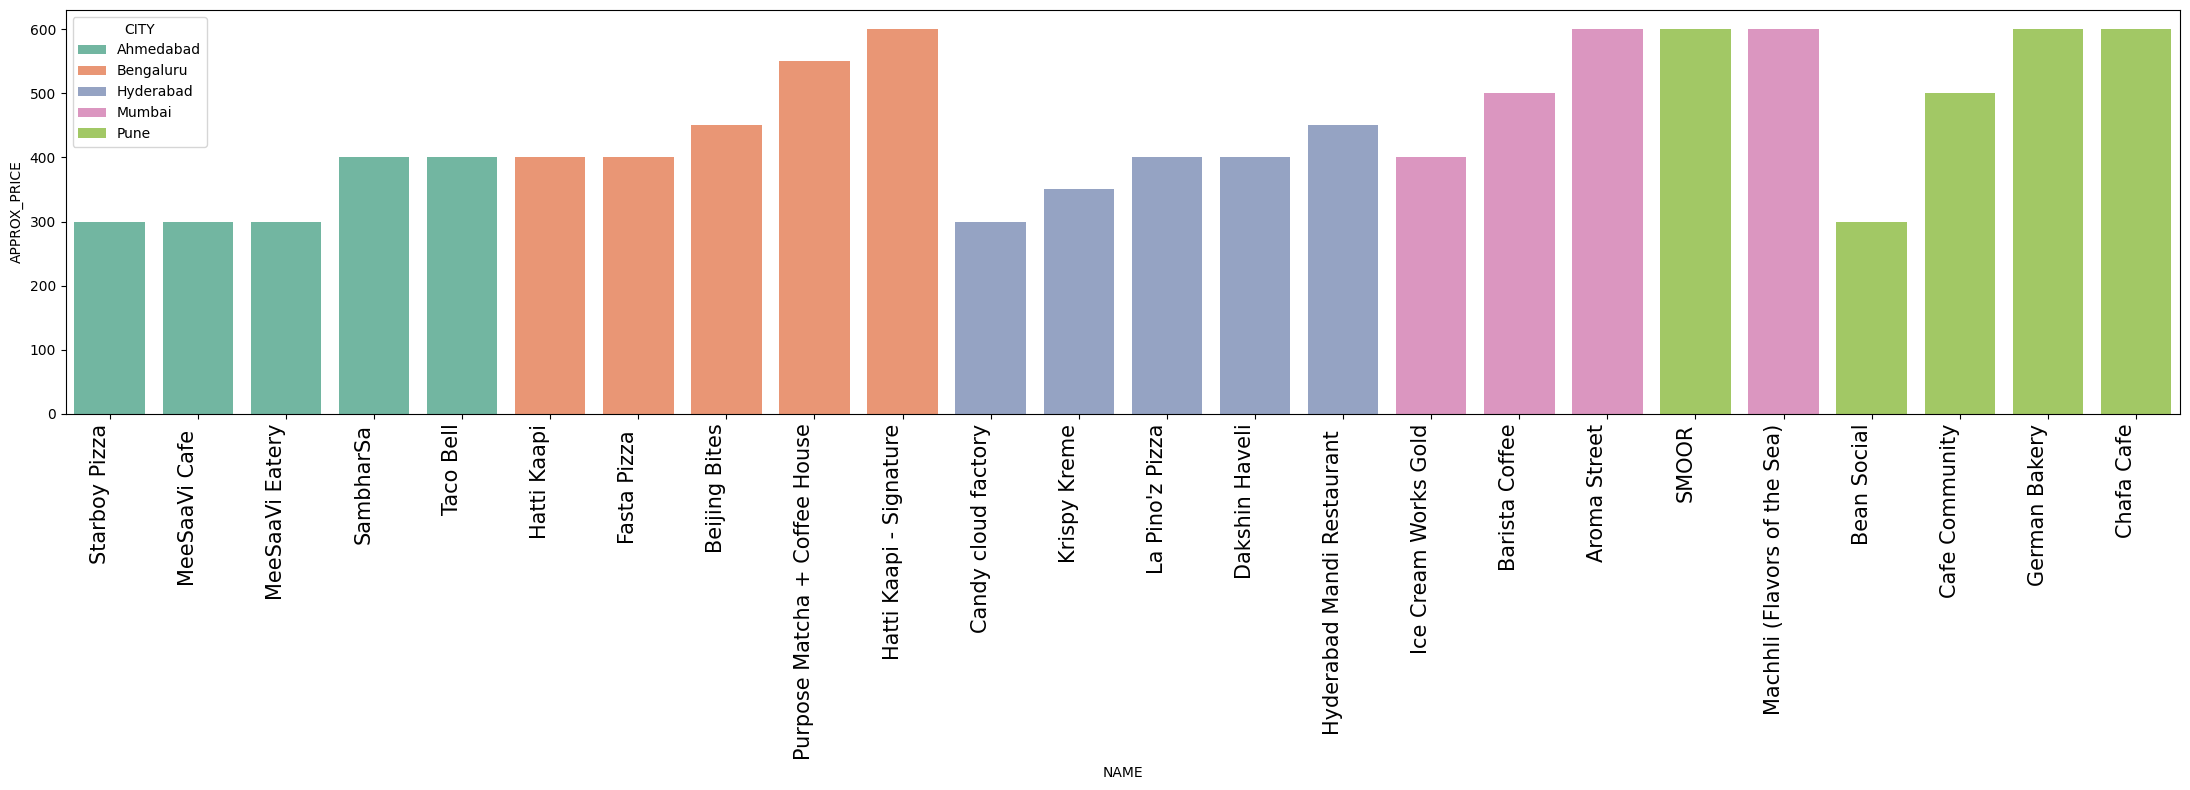

In [104]:
top5_cheapest = df.sort_values(["CITY", "APPROX_PRICE"]).groupby("CITY").head(5)
top5_cheapest[["CITY", "NAME", "APPROX_PRICE"]]


plt.figure(figsize=(22,8))
sns.barplot(data=top5_cheapest, x="NAME", y="APPROX_PRICE",
            hue="CITY", dodge=False, palette="Set2")
plt.xticks(rotation=90, ha="right", fontsize=15)
plt.tight_layout()
plt.show()


### 7) Top 5 Most Expensive Restaurants in Each City

In [105]:
top_most_expensive = (
    df.sort_values(["CITY", "APPROX_PRICE"], ascending=[True, False])
      .groupby("CITY")
      .head(5)
)
top_most_expensive[["CITY", "NAME", "APPROX_PRICE"]]


,CITY,NAME,APPROX_PRICE
124,Ahmedabad,Zodiac,2200
10,Ahmedabad,Barbeque Nation,2100
50,Ahmedabad,Bayleaf,2000
88,Ahmedabad,Welcomcafe' Ikkat,2000
95,Ahmedabad,Nomad Experience,2000
506,Bengaluru,Kai Bar and Kitchen,4400
453,Bengaluru,Cahoots Classic Bar House,4000
443,Bengaluru,Tiamo,3000
457,Bengaluru,Juliet,3000
480,Bengaluru,RCB Bar & Cafe,3000


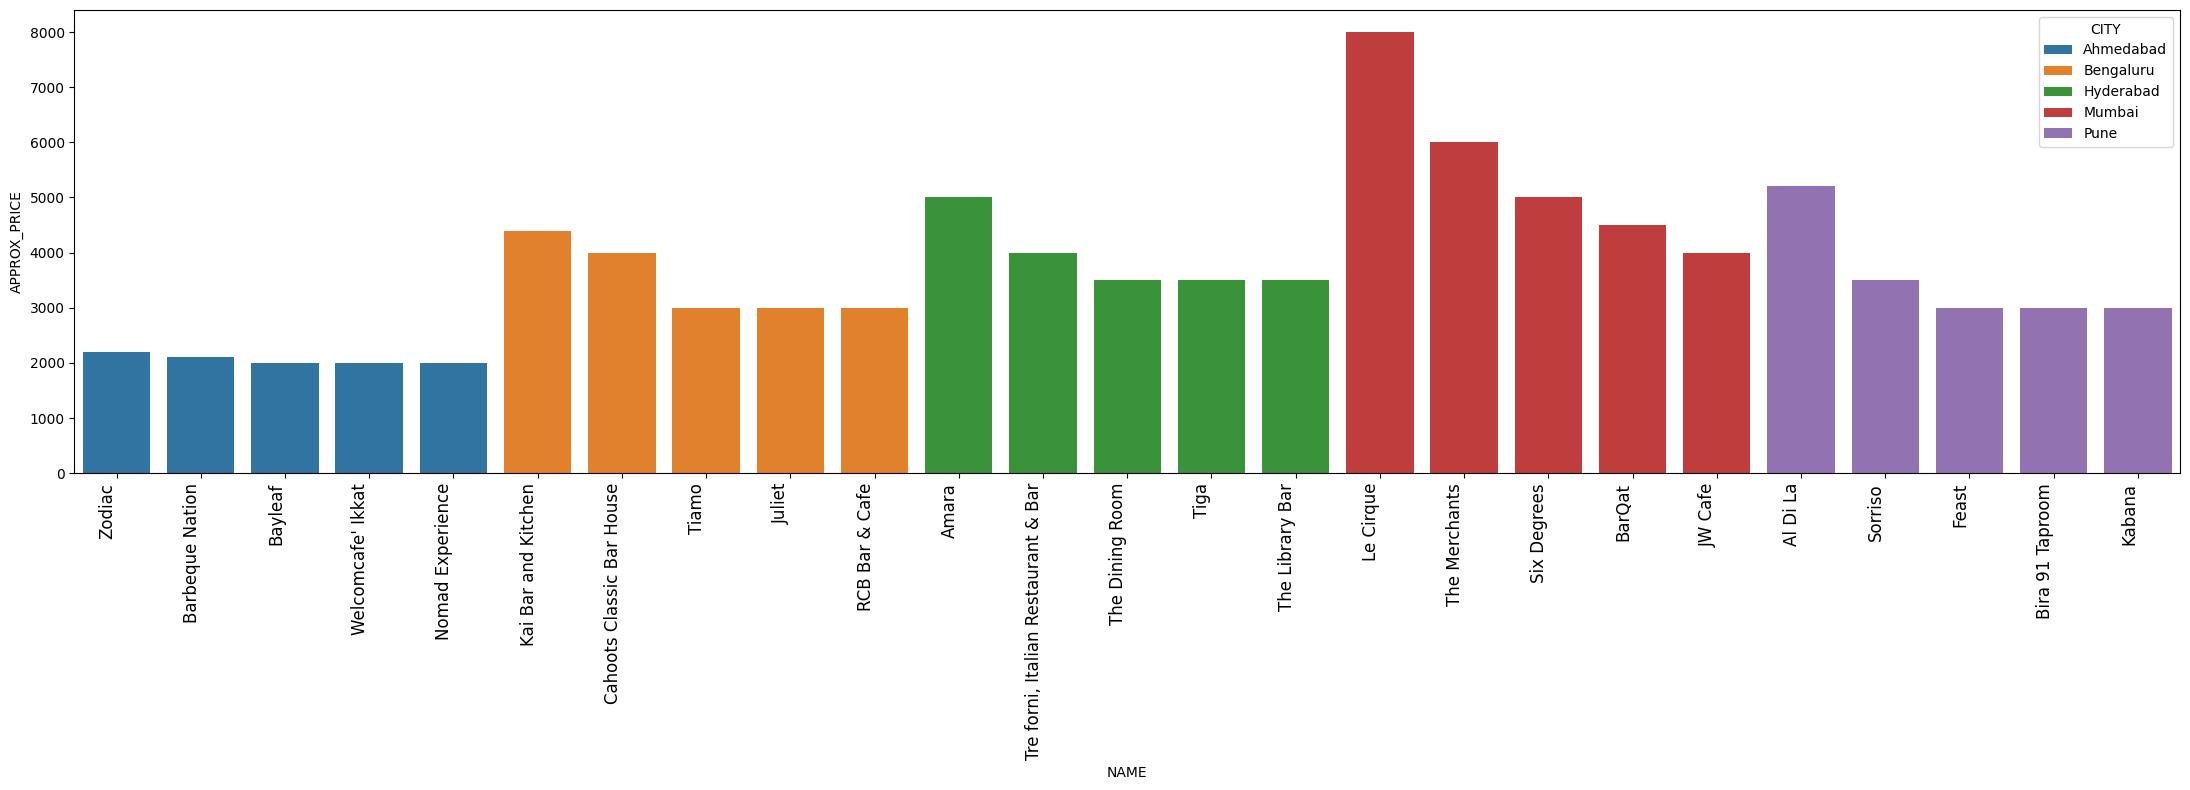

In [106]:
df2 = df.sort_values(["CITY","APPROX_PRICE"], ascending=[True,False]).groupby("CITY").head(5)

plt.figure(figsize=(22,8))  
sns.barplot(data=df2, x="NAME", y="APPROX_PRICE", hue="CITY", dodge=False)

plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


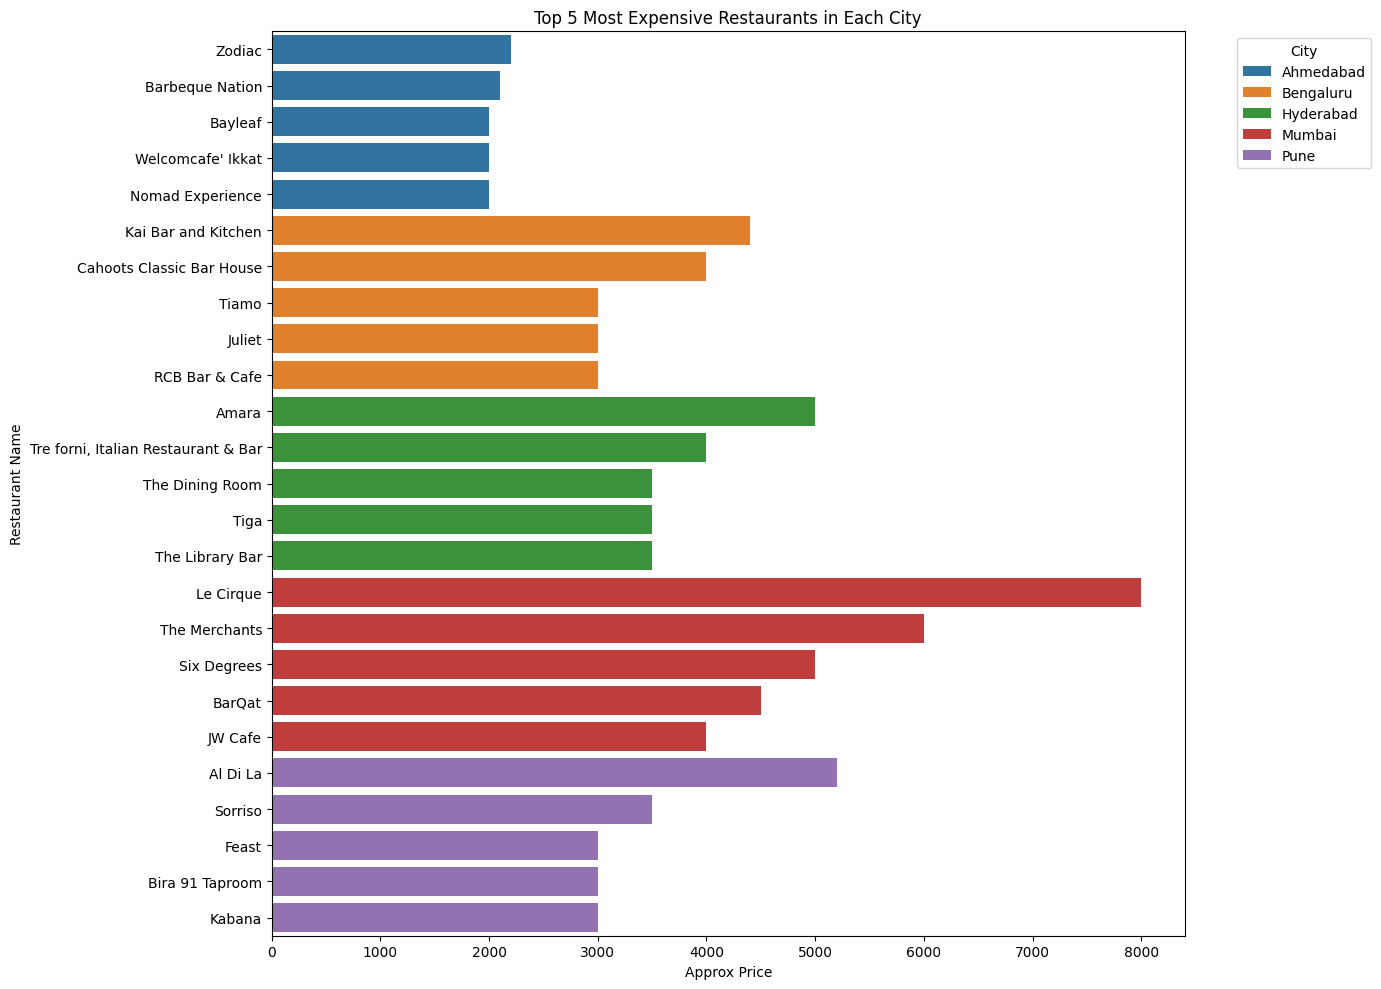

In [107]:
top_expensive = df.sort_values(["CITY", "APPROX_PRICE"], ascending=[True, False]) \
                  .groupby("CITY").head()

plt.figure(figsize=(14, 10))
sns.barplot(data=top_expensive, x="APPROX_PRICE", y="NAME", hue="CITY", dodge=False)
plt.title("Top 5 Most Expensive Restaurants in Each City")
plt.xlabel("Approx Price")
plt.ylabel("Restaurant Name")
plt.legend(title="City", bbox_to_anchor=(1.05,1), loc="upper left")
plt.savefig("Top 5 Most Expensive Restaurants in Each City.png",dpi = 400, bbox_inches = "tight")
plt.tight_layout()
plt.show()

### Multivariate Analysis

### 1) What is The Joint Relationship Between Price, Discount, and Rating

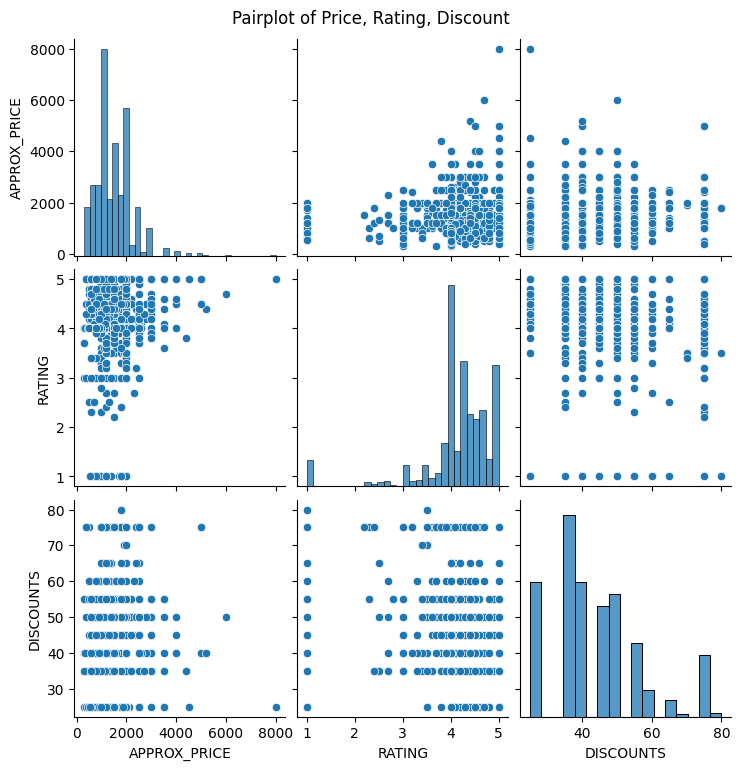

In [108]:
sns.pairplot(df[['APPROX_PRICE','RATING','DISCOUNTS']])
plt.suptitle("Pairplot of Price, Rating, Discount", y=1.02)
plt.savefig("Pairplot of Price, Rating, Discount.png",dpi = 400, bbox_inches = "tight")
plt.show()

#### Observations-
- Restaurants offering both high discounts and high ratings are rare → quality may trump discounts.
- Most products have lower prices, higher ratings, and moderate discounts.
- There is little to no correlation between price, rating, and discount; each seems independent.
- Discounts do not guarantee better ratings or favor any price level

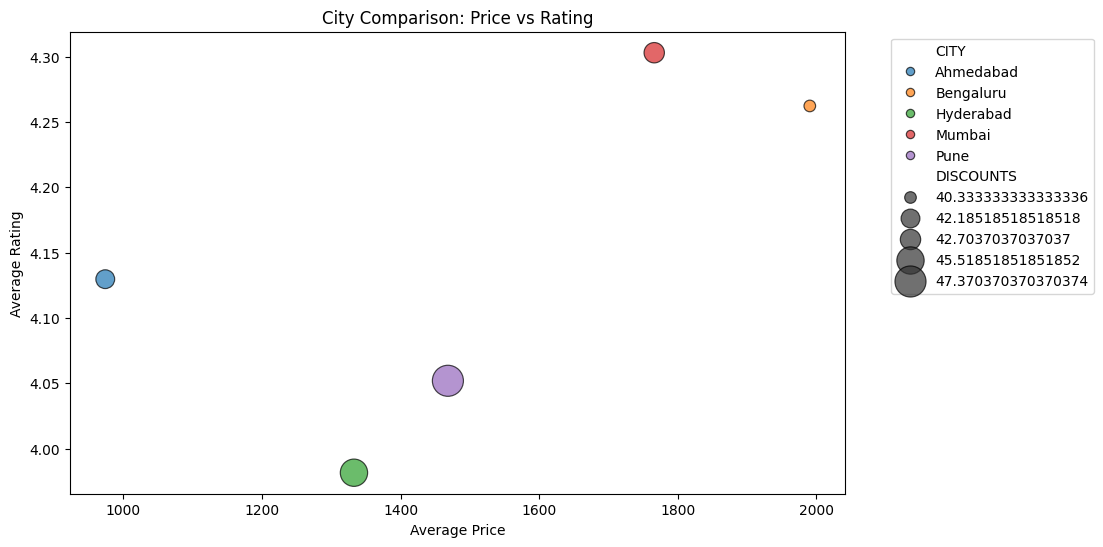

In [109]:
# Group by city and calculate average price, discount, and rating
city_summary = df.groupby("CITY").agg({"APPROX_PRICE": "mean","DISCOUNTS": "mean","RATING": "mean"}).reset_index()

# Take top 10 cities with most restaurants for fairness
top_cities = df["CITY"].value_counts().head(10).index
city_summary = city_summary[city_summary["CITY"].isin(top_cities)]

# Scatterplot: Price vs Rating, bubble size = Discounts
plt.figure(figsize=(10,6))
sns.scatterplot(data=city_summary,x="APPROX_PRICE", y="RATING", size="DISCOUNTS", hue="CITY", palette="tab10", sizes=(70,500), alpha=0.7,edgecolor="black")
plt.title("City Comparison: Price vs Rating")
plt.xlabel("Average Price")
plt.ylabel("Average Rating")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

### Observation-
- Cities in the top-right of the scatterplot have higher prices & higher ratings → premium dining experience.
- Cities in the middle with medium prices, good ratings, and medium bubbles (discounts) → best balance for customers.
- Large bubbles (bigger discounts) show cities where restaurants compete harder with offers.
- A city that has reasonable prices, good ratings, and noticeable discounts is considered the best balance

C:\Users\Admin\AppData\Local\Temp\ipykernel_3652\3763215899.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


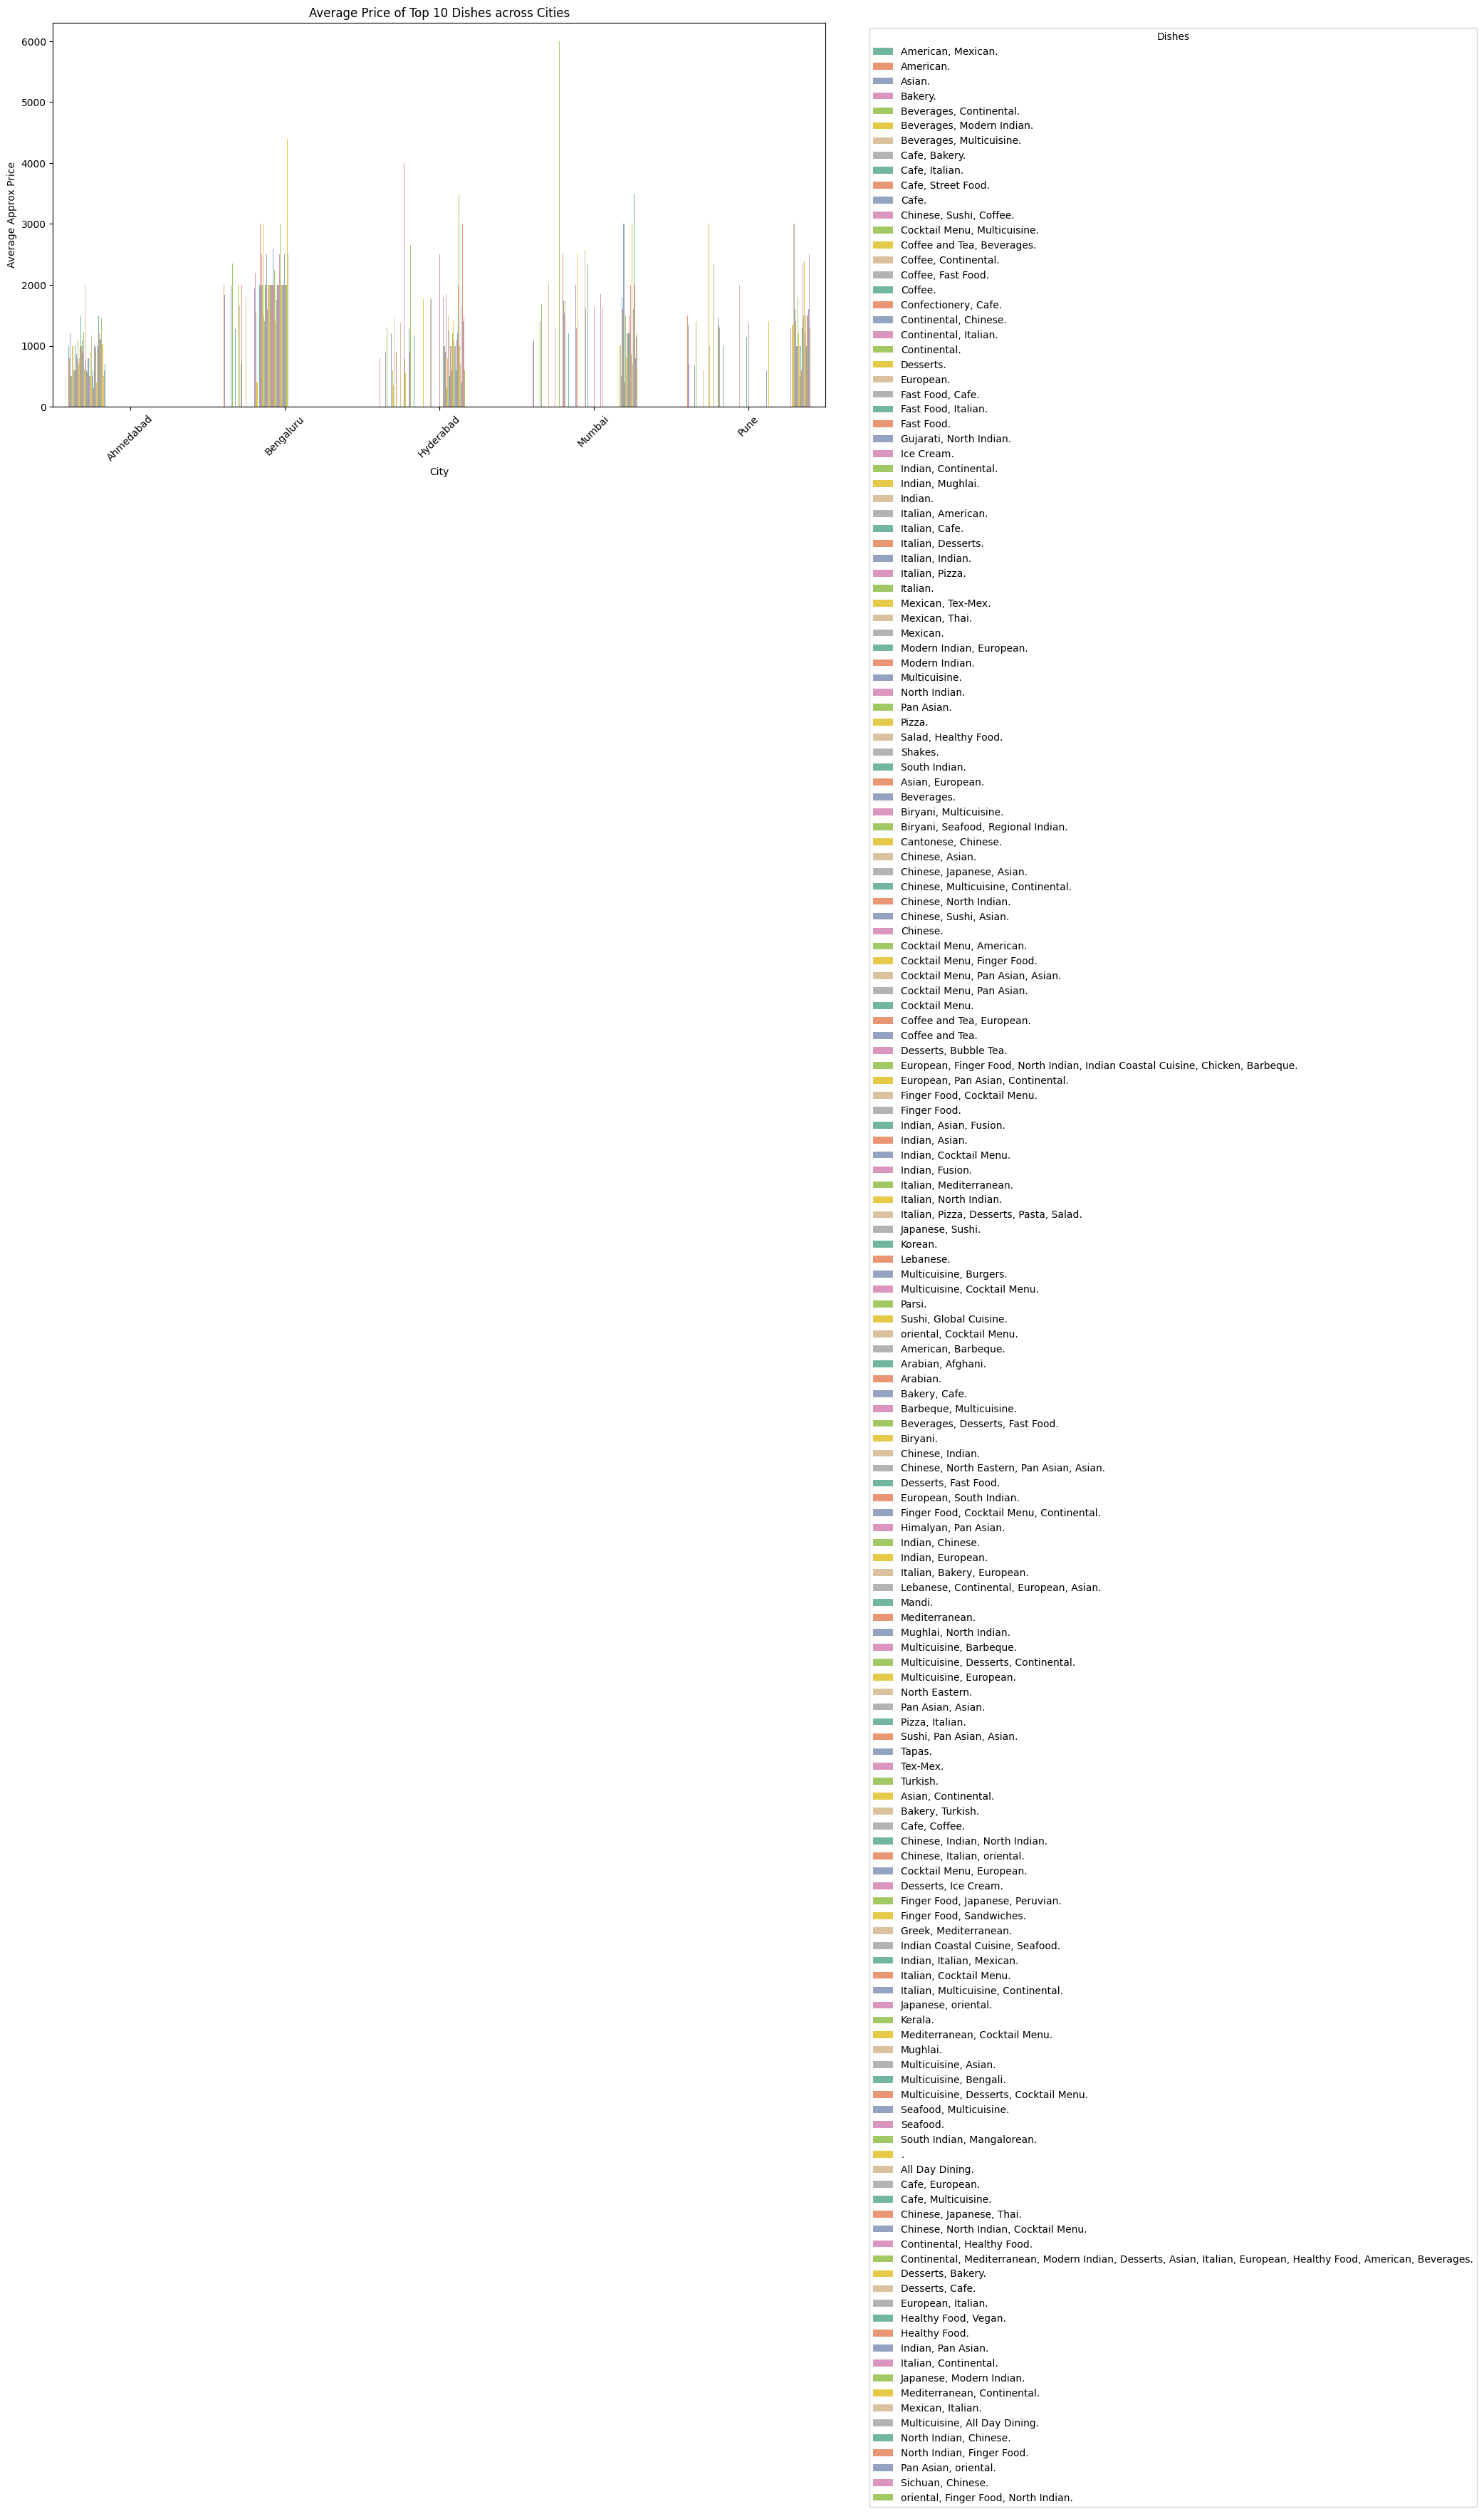

In [110]:
# Group by City & Cuisine (DISHES), take average price
city_cuisine_price = df.groupby(["CITY", "DISHES"])["APPROX_PRICE"].mean().reset_index()

plt.figure(figsize=(14,7))
sns.barplot(data=city_cuisine_price, x="CITY", y="APPROX_PRICE", hue="DISHES", palette="Set2")

plt.title("Average Price of Top 10 Dishes across Cities")
plt.xlabel("City")
plt.ylabel("Average Approx Price")
plt.legend(title="Dishes", bbox_to_anchor=(1.05,1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()